# Demo

This notebook demos the use of a Kalman filter to recover the states for the model described in [Vargas and Melatos 2023](https://arxiv.org/pdf/2305.09079.pdf)


It uses as its basis UKF code from O'Leary

# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
try:
    sys.path.remove("../joe_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../joe_src") # Means that I dont have to make src/ a proper python package

# Check synthetic data looks ok

In [25]:
import numpy as np 
from DataGenerator import GetData
#Define all parameters 
x0                             = [1.5051430406, -5.1380792001e-14, 5.23e-27]        #initial conditions of nu, nu dot, nu double dot for generating synthetic data
γ                              = [1e-13, 3e-13, 1e-6]                                    #the gammas 
n                              = 3                                                     #pulsar braking index
σp                             = 2.5e-32                                               #process noise sigma which acts on nu double dot
σm                             = 1e-7                                                 #measurement noise sigma which acts on the state nu to give us our observations
seed                           = 1234

#Define the observation period
NObs = 1000
day = 86400
num_days = 1.5e3
t   = np.linspace(0,num_days*day,NObs) #Nobs observations over num_days

#Generate some synthetic data
states,observations = GetData(t, x0, γ, n, σp, σm, seed)


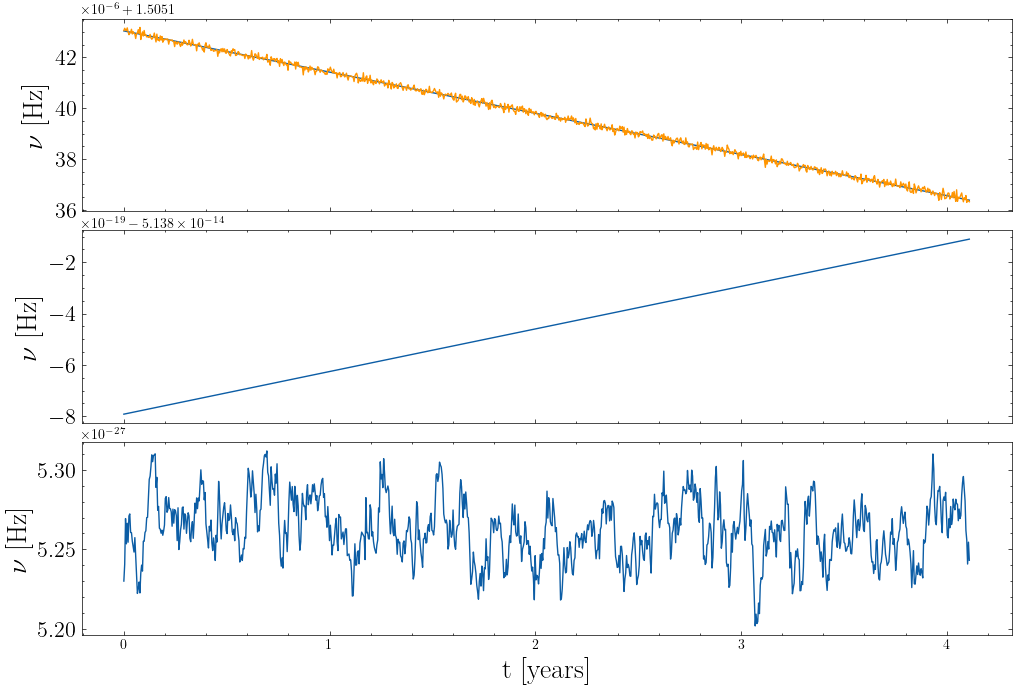

In [26]:
import matplotlib.pyplot as plt 
import scienceplots # noqa: F401

plt.style.use('science')

tplot = t / (365*24*3600)

h,w = 12,8
rows = 3 #one for every state
cols = 1
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=True)

#Plot the states
for i,ax in enumerate(axes):
    ax.plot(tplot,states[:,i])


#Also plot the measurement
axes[0].plot(tplot,observations,c='C2')


fs=20
axes[-1].set_xlabel('t [years]', fontsize=fs)

axes[0].set_ylabel(r'$\nu$ [Hz]', fontsize=fs)
axes[1].set_ylabel(r'$\nu$ [Hz]', fontsize=fs)
axes[2].set_ylabel(r'$\nu$ [Hz]', fontsize=fs)


for ax in axes:
    ax.yaxis.set_tick_params(labelsize=fs-4)

plt.subplots_adjust(wspace=0.1, hspace=0.1)


plt.show()


In [27]:
import numpy as np 
from DataGenerator import GetData
#Define all parameters 
x0                             = [1.5051430406, -5.1380792001e-14, 5.23e-27]        #initial conditions of nu, nu dot, nu double dot for generating synthetic data
γ                              = [1e-13, 3e-13, 1e-6]                                    #the gammas 
n                              = 10                                                     #pulsar braking index
σp                             = 2.5e-32                                               #process noise sigma which acts on nu double dot
σm                             = 1e-7                                                 #measurement noise sigma which acts on the state nu to give us our observations
seed                           = 1234

#Define the observation period
NObs = 1000
day = 86400
num_days = 1.5e3
t   = np.linspace(0,num_days*day,NObs) #Nobs observations over num_days

#Generate some synthetic data
states1,observations1 = GetData(t, x0, γ, n, σp, σm, seed)


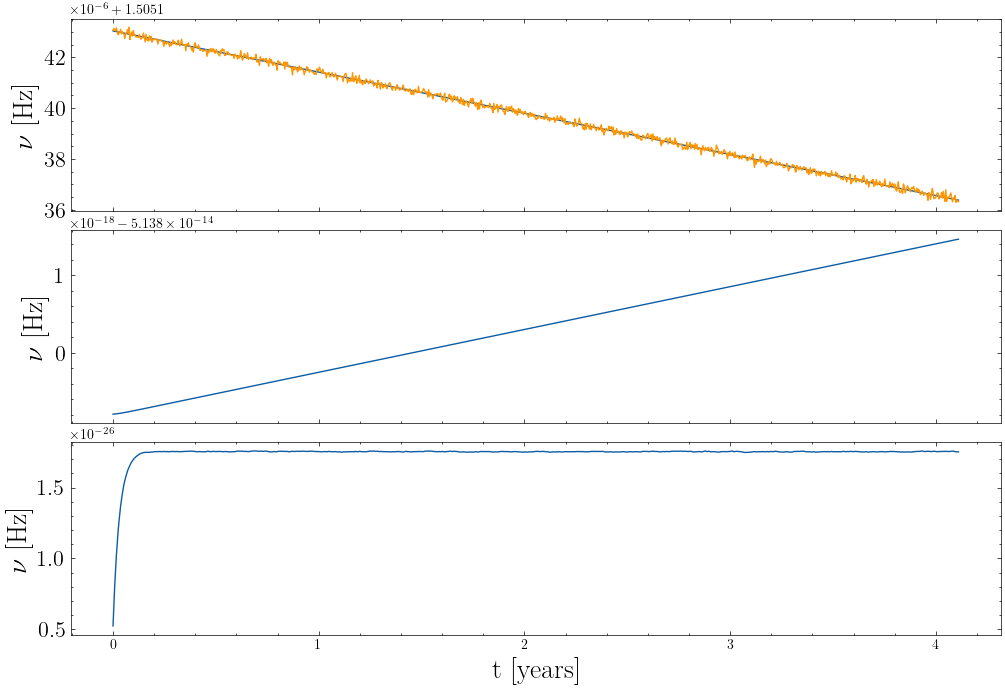

In [28]:
import matplotlib.pyplot as plt 
import scienceplots # noqa: F401

plt.style.use('science')

tplot = t / (365*24*3600)

h,w = 12,8
rows = 3 #one for every state
cols = 1
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=True)

#Plot the states
for i,ax in enumerate(axes):
    ax.plot(tplot,states1[:,i])


#Also plot the measurement
axes[0].plot(tplot,observations1,c='C2')


fs=20
axes[-1].set_xlabel('t [years]', fontsize=fs)

axes[0].set_ylabel(r'$\nu$ [Hz]', fontsize=fs)
axes[1].set_ylabel(r'$\nu$ [Hz]', fontsize=fs)
axes[2].set_ylabel(r'$\nu$ [Hz]', fontsize=fs)


for ax in axes:
    ax.yaxis.set_tick_params(labelsize=fs-4)

plt.subplots_adjust(wspace=0.1, hspace=0.1)


plt.show()


In [29]:
states1 - states

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.03316728e-22, 1.48948230e-27],
       [0.00000000e+00, 3.87329783e-22, 2.79826814e-27],
       ...,
       [1.01118447e-10, 1.57565703e-18, 1.22764816e-26],
       [1.01322950e-10, 1.57724966e-18, 1.22764802e-26],
       [1.01527675e-10, 1.57884228e-18, 1.22764788e-26]])